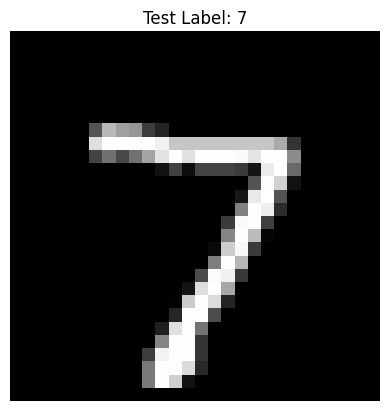

Predicted Label: 7


In [4]:
import cv2
import numpy as np
from skimage.feature import hog, local_binary_pattern
from mahotas.features import zernike_moments
from tensorflow.keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Feature extraction function
def extract_features(image):
    # Pixel intensities
    pixel_intensities = image.flatten()
    
    # HOG features
    hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    
    # Corner detection
    corners = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04).flatten()
    
    # Edge detection
    edges = cv2.Canny(image, 100, 200).flatten()
    
    # Texture (LBP)
    lbp_features = local_binary_pattern(image, P=8, R=1, method="uniform").flatten()
    
    # Zernike moments
    zm_features = zernike_moments(image, radius=15)
    
    # Combine all features
    combined_features = np.hstack([pixel_intensities, hog_features, corners, edges, lbp_features, zm_features])
    return combined_features

# Extract features for the training and testing datasets
x_train, y_train = mnist.load_data()[0]  # Training data is already loaded, but we need the labels
x_train_features = np.array([extract_features(img) for img in x_train])

# Train an SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(x_train_features, y_train)

# Save the trained model
import joblib
joblib.dump(clf, 'digit_recognition_model.pkl')

# Select a test image
test_image = x_test[0]  # You can choose any index here
test_label = y_test[0]

# Display the test image
plt.imshow(test_image, cmap='gray')
plt.title(f"Test Label: {test_label}")
plt.axis('off')
plt.show()

# Extract features from the test image
test_image_features = extract_features(test_image).reshape(1, -1)

# Make a prediction on the test image
prediction = clf.predict(test_image_features)
print(f"Predicted Label: {prediction[0]}")

